In [3]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cdv_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Import Dataset

In [4]:
df_api = pd.read_csv("../db/cdv/cordova_API.csv")
df_plugin_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_DECLARATION.csv")
df_plugin_permission_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_PERMISSION_DECLARATION.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [5]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [6]:
l_api = list(df_api.columns)
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [7]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,10,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,100,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,101,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,102,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2655,za.co.snapplify.garfield,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


In [8]:
df_plugin_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration,config.xml,plugins.xml
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
1,10,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0
2,100,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0
3,101,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1
4,102,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
2655,za.co.snapplify.garfield,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
2656,za.co.snapplify.lowveldliving,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
2657,za.co.snapplify.purpleturtle,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1


In [9]:
df_plugin_permission_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
1,10,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
2,100,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1
3,101,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
4,102,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2655,za.co.snapplify.garfield,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2656,za.co.snapplify.lowveldliving,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1
2657,za.co.snapplify.purpleturtle,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [10]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,5,0,0,2,1,7,0,0,0,2,0,0,0,0,0
1,5,0,0,1,0,7,1,0,0,2,0,1,0,0,0
2,5,0,0,29,15,7,1,0,0,3,0,1,0,0,0
3,5,6,1,6,2,5,2,0,0,2,3,0,0,0,0
4,5,1,1,58,2,8,1,1,0,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2655,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2656,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0
2657,5,0,0,55,0,7,0,0,0,2,0,0,0,0,0


### The occurance of plugins for entire dataset

In [11]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=True)
df_cnt

Total APKs: 2659


vibration                22
inappbrowser            256
statusbar               284
globalization           793
media-capture           888
contacts                935
splashscreen           1157
camera                 1374
network-information    1435
geolocation            1728
dialogs                1964
battery-status         1982
media                  2095
file                   2251
device                 2633
dtype: int64

In [12]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

vibration               0.83
inappbrowser            9.63
statusbar              10.68
globalization          29.82
media-capture          33.40
contacts               35.16
splashscreen           43.51
camera                 51.67
network-information    53.97
geolocation            64.99
dialogs                73.86
battery-status         74.54
media                  78.79
file                   84.66
device                 99.02
dtype: float64

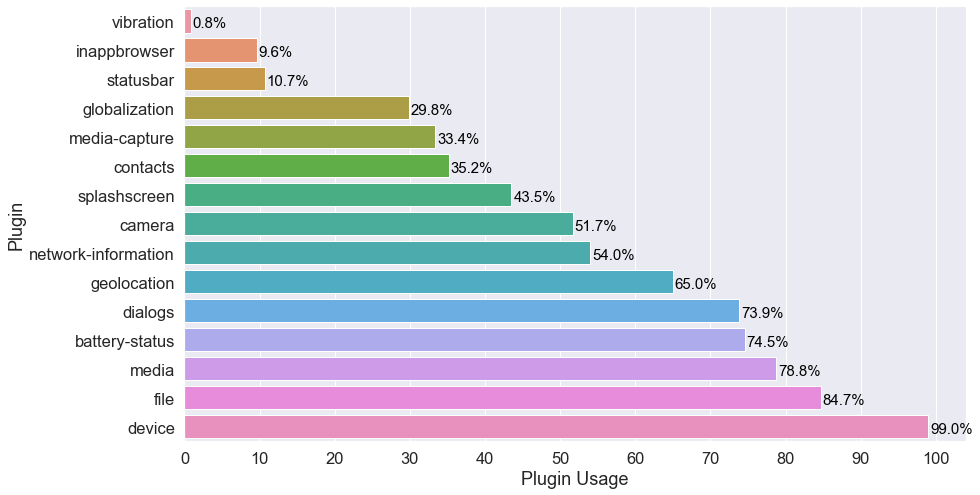

In [13]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Usage")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins declaration

In [14]:
df_plugin_declaration_only = df_plugin_declaration.drop(columns=["apk_name", "config.xml", "plugins.xml"])
df_plugin_dc = df_plugin_declaration_only
total_apk = df_plugin_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_dc_cnt = df_plugin_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_dc_cnt

Total APKs: 2659


statusbar               100
vibration               313
globalization           953
inappbrowser           1206
battery-status         1731
contacts               1767
media-capture          1813
geolocation            1929
media                  1939
splashscreen           1956
camera                 2065
network-information    2069
file                   2172
dialogs                2284
device                 2385
dtype: int64

In [15]:
# percentage of apks using each plugin
df_plugin_dc_pct = df_plugin_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_dc_pct

statusbar               3.76
vibration              11.77
globalization          35.84
inappbrowser           45.36
battery-status         65.10
contacts               66.45
media-capture          68.18
geolocation            72.55
media                  72.92
splashscreen           73.56
camera                 77.66
network-information    77.81
file                   81.68
dialogs                85.90
device                 89.70
dtype: float64

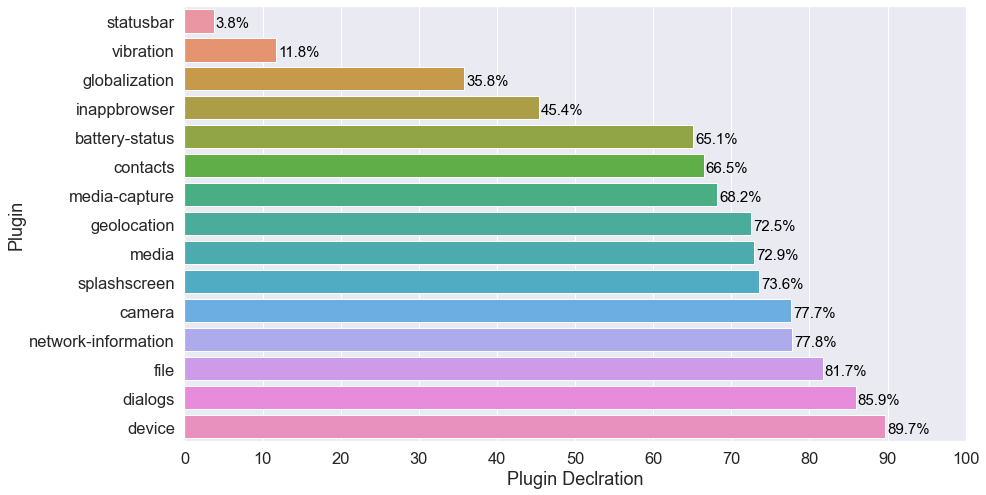

In [16]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_dc_pct.values, y=df_plugin_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugin Uages VS. Plugin Dclaration

In [17]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values)
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration
0,battery-status,74.54,65.10
1,camera,51.67,77.66
2,contacts,35.16,66.45
3,device,99.02,89.70
4,dialogs,73.86,85.90
5,file,84.66,81.68
6,geolocation,64.99,72.55
7,globalization,29.82,35.84
8,inappbrowser,9.63,45.36
9,media,78.79,72.92


In [18]:
# order by value in declaration
df_plugin_vs_order = df_plugin_vs.sort_values(by=['declaration'])
df_plugin_vs_order

,plugin,usage,declaration
13,statusbar,10.68,3.76
14,vibration,0.83,11.77
7,globalization,29.82,35.84
8,inappbrowser,9.63,45.36
0,battery-status,74.54,65.10
2,contacts,35.16,66.45
10,media-capture,33.40,68.18
6,geolocation,64.99,72.55
9,media,78.79,72.92
12,splashscreen,43.51,73.56


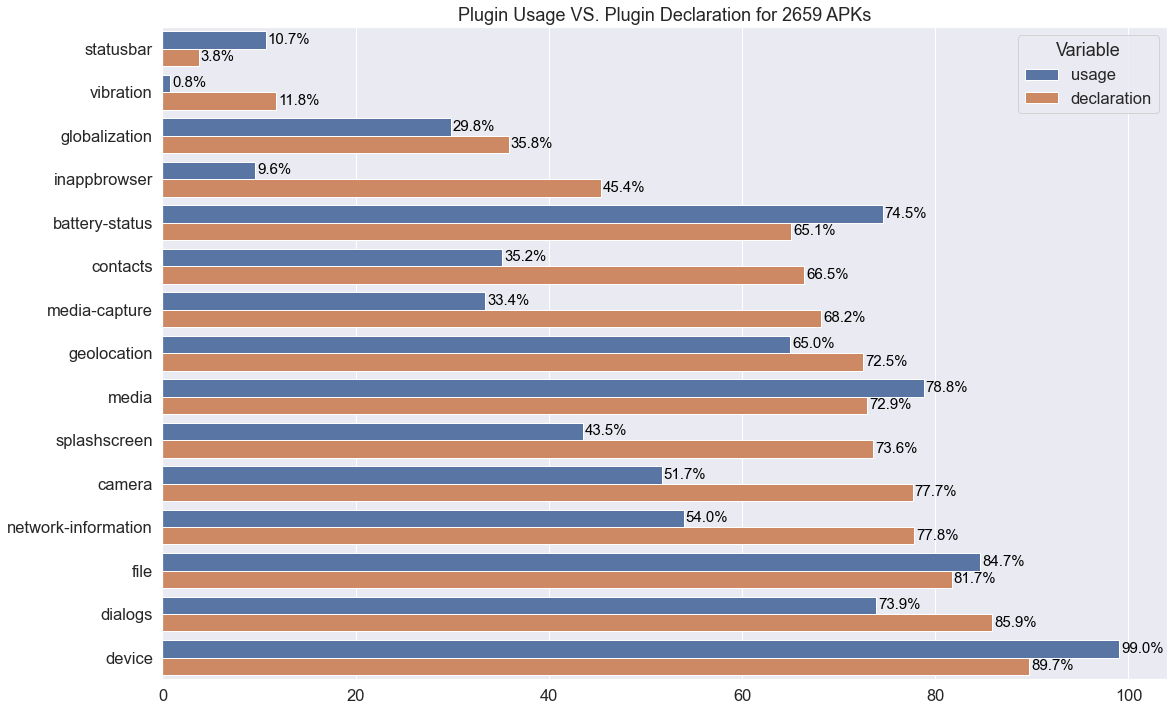

In [19]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 12))
tidy = df_plugin_vs_order.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title(f'Plugin Usage VS. Plugin Declaration for {total_apk} APKs')
plt.show()

### XML analysis

In [20]:
# count APKs missing plugins or config
df_xml = df_plugin_declaration[["config.xml", "plugins.xml"]]
total_apk = df_xml.shape[0]
print(f"Total APKs: {total_apk}")
df_xml_cnt = df_xml.astype(bool).sum(axis=0).sort_values(ascending=True)
df_xml_cnt


Total APKs: 2659


plugins.xml     475
config.xml     2153
dtype: int64

In [21]:
df_xml["config+plugins"] = df_xml["config.xml"] + df_xml["plugins.xml"]
df_xml

<ipython-input-21-2db17a2d16a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xml["config+plugins"] = df_xml["config.xml"] + df_xml["plugins.xml"]


,config.xml,plugins.xml,config+plugins
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,1,0,1
...,...,...,...
2654,0,1,1
2655,0,1,1
2656,0,1,1
2657,0,1,1


[55, 2518, 86]


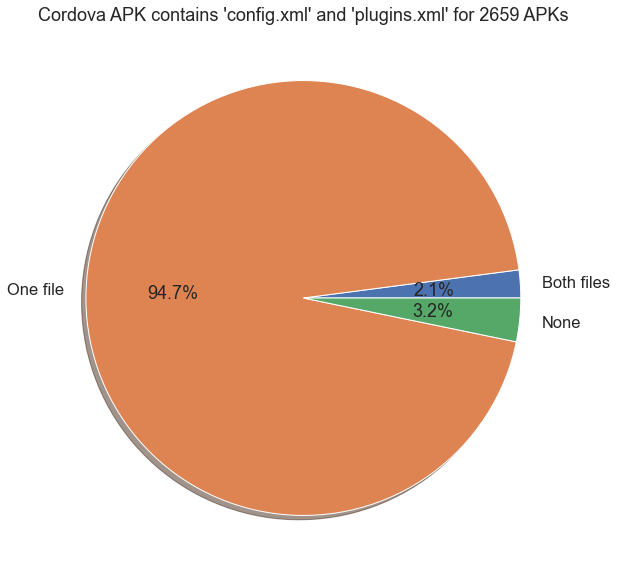

In [22]:
xlm_values = Counter(df_xml['config+plugins'])
labels = ["Both files", "One file", "None"]
sizes = [xlm_values[2], xlm_values[1], xlm_values[0]]
print(sizes)
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# ax1.axis('equal')
plt.title(f"Cordova APK contains 'config.xml' and 'plugins.xml' for {df_xml.shape[0]} APKs")
plt.show()

# Delete APK has none

In [23]:
def output_xml_csv(filename, df_output):
    df_output_new = deepcopy(df_output)
    df_output_new["config+plugins"] = df_xml["config+plugins"]
    df_output_new = df_output_new[df_output_new["config+plugins"]>0]
    df_output_new = df_output_new.drop(columns=["config+plugins"])
    df_output_new.to_csv(f"../db/cdv/{filename}.csv", index=False)


In [24]:
output_xml_csv("cordova_API_xml", df_api)
df_plugin_declaration = df_plugin_declaration.drop(columns=["config.xml", "plugins.xml"])
output_xml_csv("cordova_PLUGIN_DECLARATION_xml", df_plugin_declaration)
output_xml_csv("cordova_PLUGIN_PERMISSION_DECLARATION_xml", df_plugin_permission_declaration)


## Heatmap

### Heatmap for Entire database

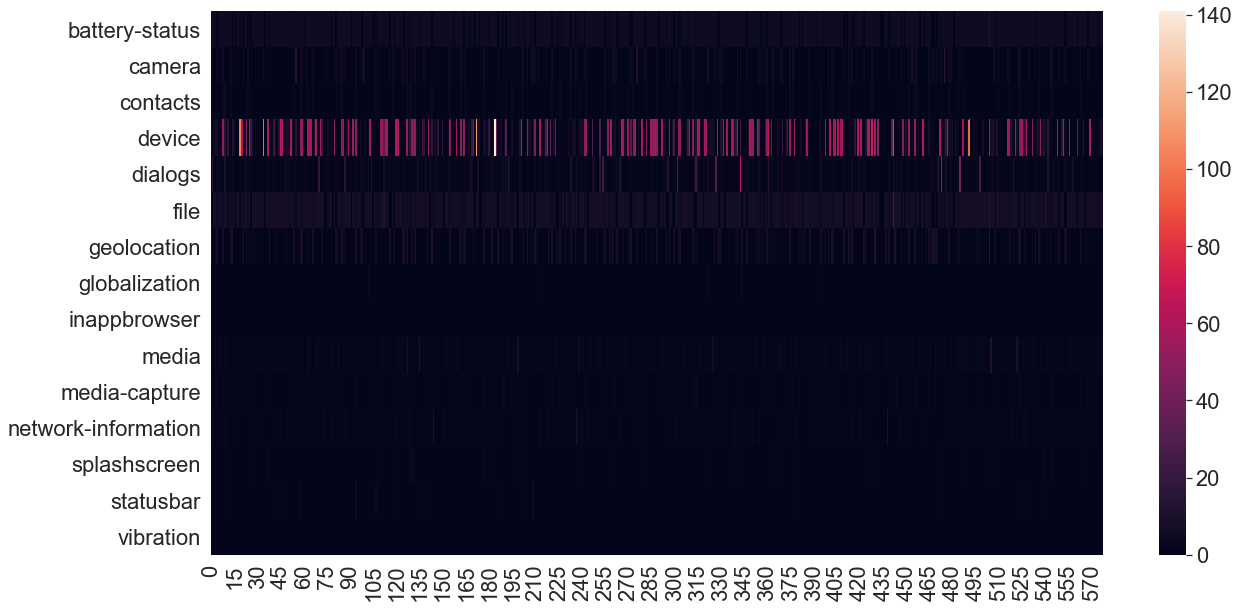

In [23]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)

### Heatmap for a small set of dataset

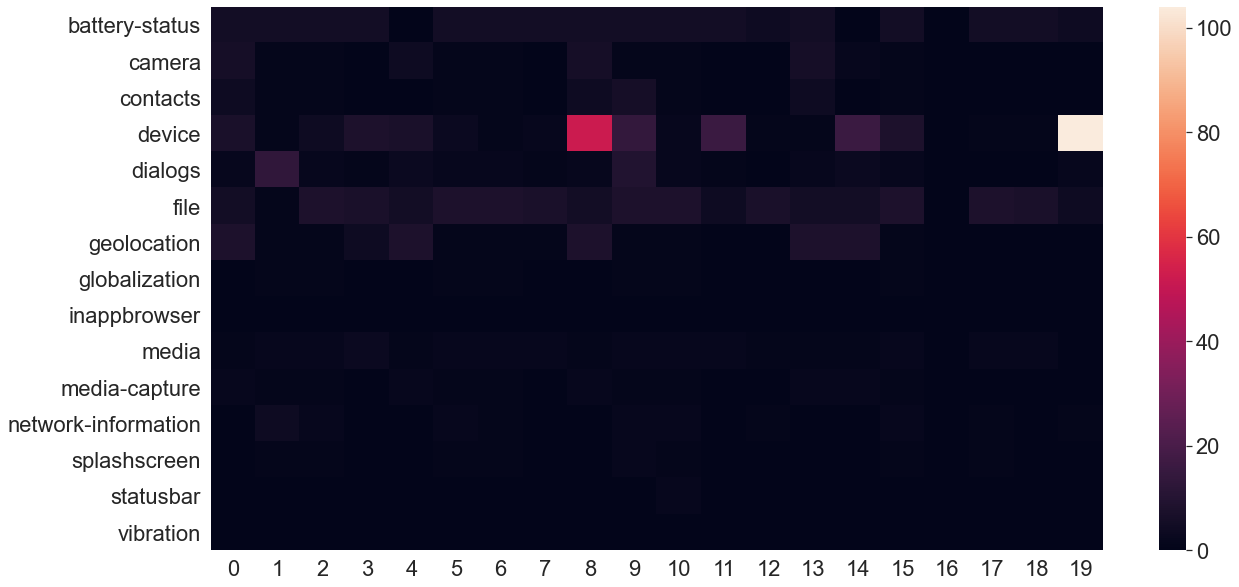

In [24]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])


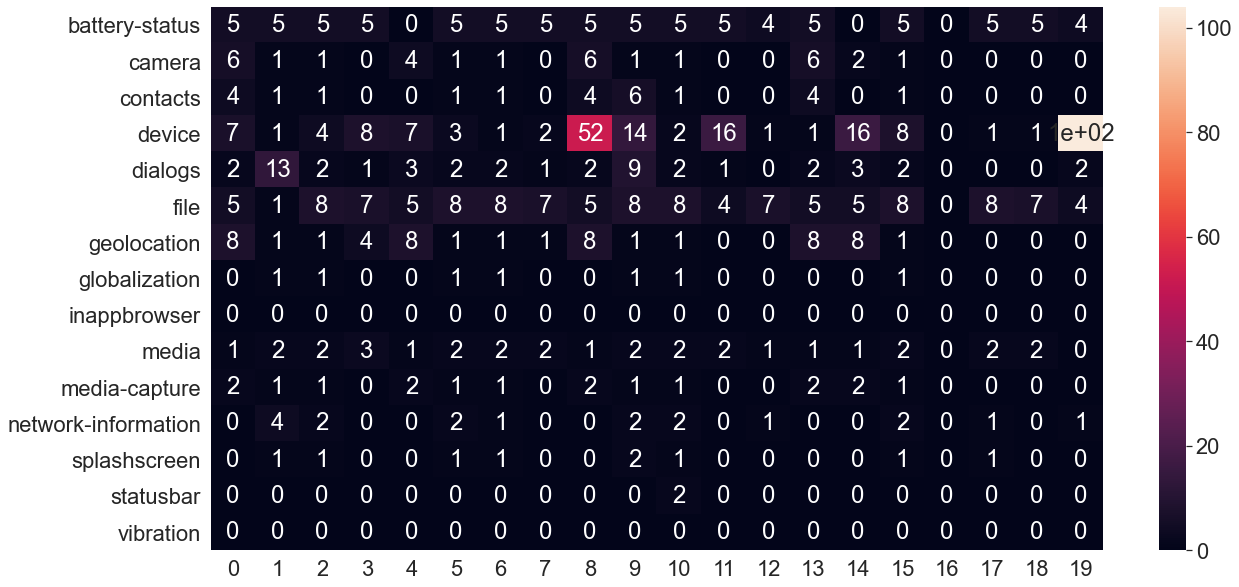

In [25]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

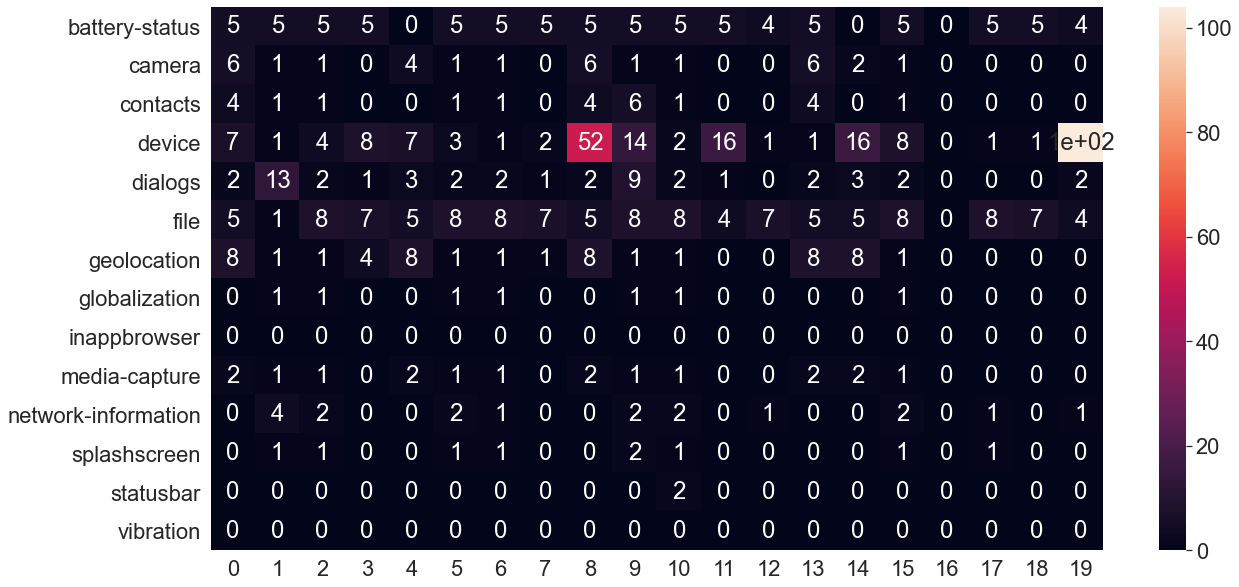

In [26]:

df_plugins_media = df_api.drop(columns=["apk_name", "media"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)